In [ ]:
#Descargamos book que contiene muchos libros en inglés con formato tokenizado de los cuales nos vamos a apoyar para procesar
import nltk 
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Importamos 

Analizamos texto

In [ ]:
# escogemos text1 que es el famoso libro Moby Dick
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
# Vemos que el texto ya viene tokenizado incluyendo caracteres especiales ....
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
# ¿Cuantos tokens tiene el libro?
len(text1)

260819

Medida de riqueza lexica en un texto 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [ ]:
# Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)
# https://docs.python.org/2/library/sets.html
vocabulario = sorted(set(text1))
vocabulario[1000:1050]

['Crew',
 'Crish',
 'Crockett',
 'Cross',
 'Crossed',
 'Crossing',
 'Crotch',
 'Crowding',
 'Crown',
 'Crozetts',
 'Cruelty',
 'Cruising',
 'Cruppered',
 'Crusaders',
 'Crushed',
 'Crying',
 'Cuba',
 'Curious',
 'Curse',
 'Cursed',
 'Curses',
 'Cussed',
 'Customs',
 'Cut',
 'Cutter',
 'Cutting',
 'Cuvier',
 'Cyclades',
 'Czar',
 'D',
 'DAGGOO',
 'DAM',
 'DANCE',
 'DANCING',
 'DANIEL',
 'DANISH',
 'DARKENS',
 'DARWIN',
 'DAVENANT',
 'DEAD',
 'DEATH',
 'DEBELL',
 'DECK',
 'DEL',
 'DESTROYED',
 'DEVIL',
 'DICTIONARY',
 'DID',
 'DIGNITY',
 'DISCOVERS']

In [ ]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [ ]:
# luego definimos la medida de riqueza léxica:
rl = len(set(text1))/len(text1)
print(rl)

0.07406285585022564


In [ ]:
# podemos definir funciones en python para estas medidas léxicas:
def riqueza_lexica(texto):
  return len(set(texto))/len(texto)

def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

riqueza_lexica(text1)

0.07406285585022564

In [ ]:
# podemos calcular el porcentaje de texto que ocupa una palabra en una cadena larga de texto.
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
# y calcular en conteo el numero de veces que aparece:
text1.count('monster')

49

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [ ]:
# METODO NO recomendable para conjuntos muy grandes
dic = {}
for palabra in set(text1):
  #dic[palabra] = porcentaje_palabra(palabra, text1)
  dic[palabra] = text1.count(palabra)
dic

{'Hereby': 2,
 'Indiamen': 1,
 'cigars': 2,
 'daunted': 1,
 'Hoe': 1,
 'jealousy': 1,
 'extras': 1,
 'beaten': 4,
 'significance': 6,
 'hie': 1,
 'promising': 4,
 'other': 412,
 'Apollo': 1,
 'discreet': 1,
 'pauselessly': 1,
 'vivaciously': 2,
 'pamphlets': 1,
 'clanging': 1,
 'sleep': 44,
 'sheaths': 1,
 'farewell': 2,
 'anxiety': 3,
 'wonderfully': 2,
 'SAMUEL': 2,
 'ratification': 1,
 'meadow': 6,
 'joined': 7,
 'brindled': 1,
 'artful': 1,
 'Darien': 1,
 'stove': 22,
 'CONVERSATIONS': 1,
 'stiffen': 1,
 'lots': 1,
 'behalf': 1,
 'Didn': 11,
 '39': 1,
 'maty': 2,
 'abandoned': 7,
 'undoubted': 2,
 'legged': 3,
 'mightest': 2,
 'beadle': 2,
 'promissory': 1,
 'Dar': 1,
 'replenished': 5,
 'laughter': 1,
 'pyramids': 3,
 'signal': 7,
 'malicious': 9,
 'lawless': 2,
 'backward': 8,
 'Dan': 4,
 'open': 75,
 'L150': 1,
 'beach': 16,
 'FLOOD': 1,
 'Cetology': 6,
 'magic': 9,
 'unremoved': 1,
 'sarmon': 1,
 'contemplative': 2,
 'Dodge': 1,
 'rechurned': 1,
 'cognisable': 1,
 'crumpled': 1

## Método FreqDist de NLTK

In [ ]:
# NLTK tiene un metodo muy eficiente
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

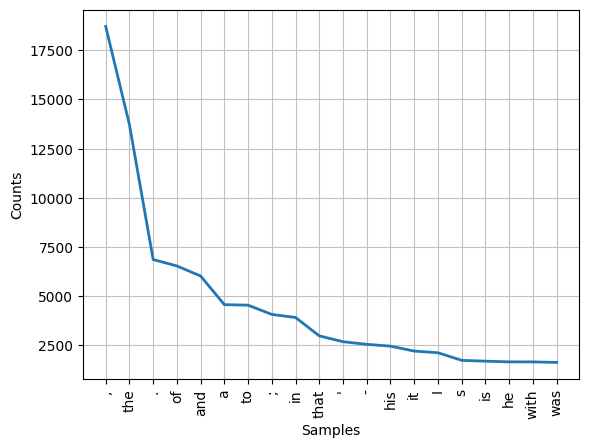

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
# Tal vez sea más interesante estudiar palabras que tengan una longitud minima especifica
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words)) #Set filtra elementos únicos y sorted los establece en orden alfabético
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
dtypes = [('word', 'S10'), ('frequency', int)]  #formatos en palabras string y frecuencia
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_ordenadas = np.sort(palabras_interesantes, order = 'frequency')
palabras_ordenadas[-20:] # top de palabras mas frecuentes

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

In [ ]:
palabras_interesantes

array([(b'strangely',  29), (b'circles',  13), (b'sharks',  50),
       (b'rushing',  17), (b'included',  11), (b'others',  37),
       (b'seizing',  11), (b'involuntar',  12), (b'written',  11),
       (b'elevated',  11), (b'manned',  13), (b'vicinity',  19),
       (b'hinted',  25), (b'ponderous',  13), (b'rigging',  33),
       (b'mostly',  11), (b'grounds',  12), (b'remember',  15),
       (b'fishery',  54), (b'settled',  12), (b'sometimes',  81),
       (b'concluded',  19), (b'thrown',  25), (b'considerab',  26),
       (b'beginning',  19), (b'hollow',  20), (b'heaven',  40),
       (b'suspended',  27), (b'former',  20), (b'interval',  25),
       (b'devils',  16), (b'future',  14), (b'wonder',  34),
       (b'stranded',  12), (b'afloat',  12), (b'enormous',  26),
       (b'wanting',  11), (b'itself',  84), (b'mighty',  47),
       (b'pulled',  13), (b'belong',  11), (b'especially',  44),
       (b'utmost',  15), (b'blanket',  11), (b'whales', 237),
       (b'arrived',  12), (b'an

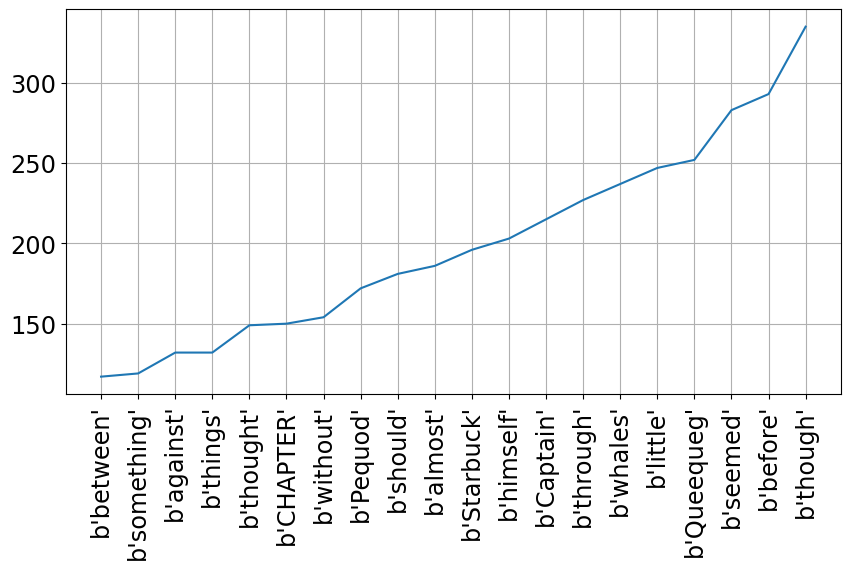

In [ ]:
# Construccion de un grafico de barras customizado con Matplotlib
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py
top_words = 20
x = np.arange(len(palabras_ordenadas[-top_words:]))
y = [freq[1] for freq in palabras_ordenadas[-top_words:]]
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_ordenadas[-top_words:]], rotation = 'vertical')
plt.tick_params(labelsize = 'xx-large')
plt.grid(True)
plt.show()